In [36]:
import json
f = open('save.json')
data = json.load(f)
f.close()

In [37]:

ls = [pd.DataFrame(i['ra']['building']) for i in data[0]]
import pandas as pd
ls = pd.concat(ls)
data = ls[[4,5]]

In [38]:
from shapely.geometry import Polygon
import geopandas
data['geometry'] = data[4].apply(lambda r:Polygon(r))
data['a'] = data[5].apply(lambda r:r[0])
data['b'] = data[5].apply(lambda r:r[1])
data = geopandas.GeoDataFrame(data)

<ipython-input-38-9f86048a3154>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['geometry'] = data[4].apply(lambda r:Polygon(r))
<ipython-input-38-9f86048a3154>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['a'] = data[5].apply(lambda r:r[0])
<ipython-input-38-9f86048a3154>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [47]:
data['a'].min()-data['a'].max(),data['b'].min()-data['b'].max()

(-9690.666666686535, -14320.0)

In [51]:
data['c'] = data['a']-data['b']

In [198]:
building = geopandas.read_file('building.json')
building

,type,TD,geometry
0,50001:1,129,"POLYGON ((9368717.000 -2924727.000, 9368597.00..."
1,50001:1,48,"POLYGON ((9369309.000 -2923767.000, 9369221.00..."
2,50001:1,30,"POLYGON ((9369213.000 -2923911.000, 9369149.00..."
3,50001:1,66,"POLYGON ((9370141.000 -2925087.000, 9370093.00..."
4,50001:1,30,"POLYGON ((9368581.000 -2924807.000, 9368485.00..."
...,...,...,...
595,50001:1,57,"POLYGON ((9385877.000 -2929663.000, 9385877.00..."
596,50001:1,15,"POLYGON ((9384853.000 -2929535.000, 9384853.00..."
597,50001:1,30,"POLYGON ((9385285.000 -2927743.000, 9385077.00..."
598,50001:1,30,"POLYGON ((9385325.000 -2928263.000, 9385053.00..."


In [201]:
b1 = building['type'].drop_duplicates().reset_index(drop = True).reset_index()
building = pd.merge(building,b1)

In [202]:
building['']

,type,TD,geometry,index
0,50001:1,129,"POLYGON ((9368717.000 -2924727.000, 9368597.00...",0
1,50001:1,48,"POLYGON ((9369309.000 -2923767.000, 9369221.00...",0
2,50001:1,30,"POLYGON ((9369213.000 -2923911.000, 9369149.00...",0
3,50001:1,66,"POLYGON ((9370141.000 -2925087.000, 9370093.00...",0
4,50001:1,30,"POLYGON ((9368581.000 -2924807.000, 9368485.00...",0
...,...,...,...,...
595,50001:1,57,"POLYGON ((9385877.000 -2929663.000, 9385877.00...",0
596,50001:1,15,"POLYGON ((9384853.000 -2929535.000, 9384853.00...",0
597,50001:1,30,"POLYGON ((9385285.000 -2927743.000, 9385077.00...",0
598,50001:1,30,"POLYGON ((9385325.000 -2928263.000, 9385053.00...",0


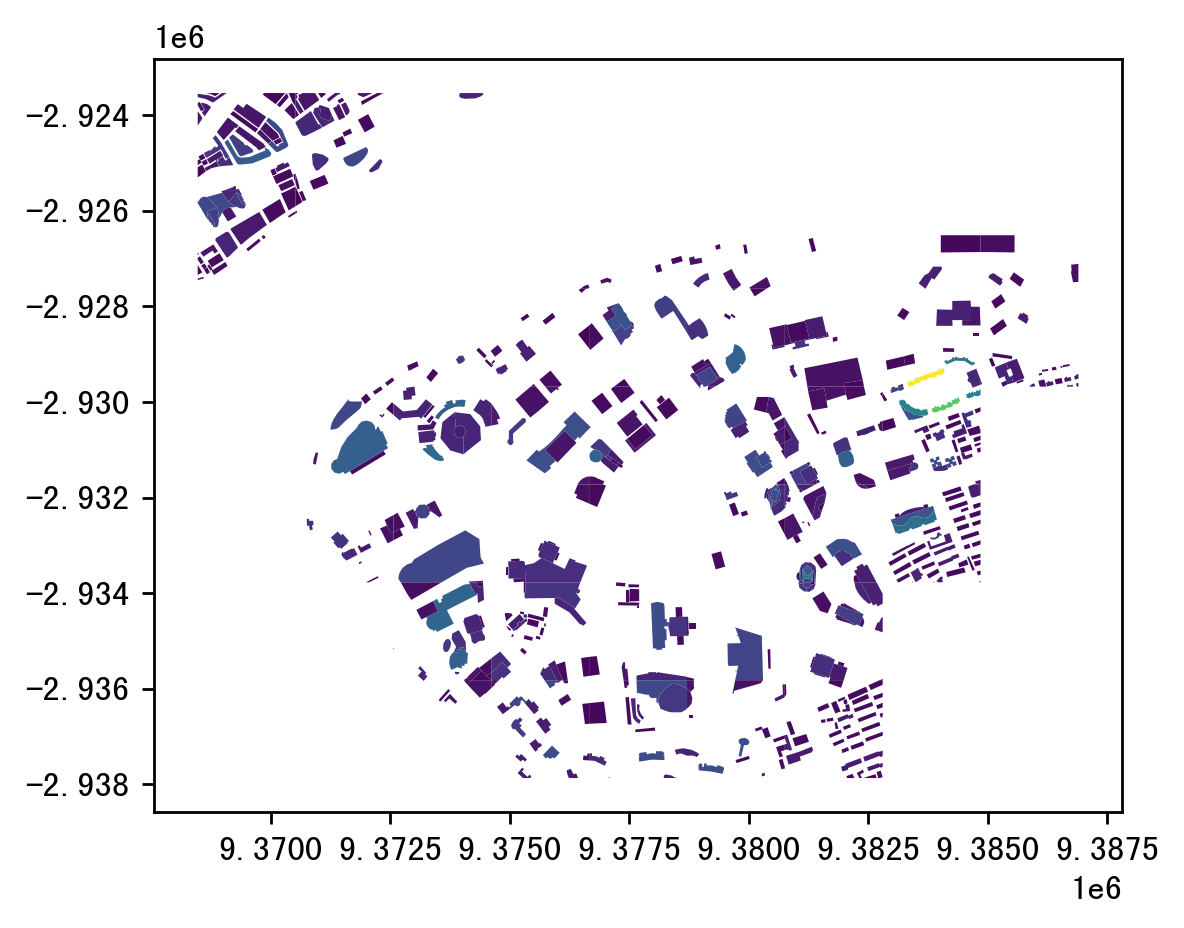

In [204]:
import matplotlib.pyplot as plt
fig     = plt.figure(1,(5,5),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)
#building[building['tilesname']=='17/109667/53528'].plot(ax = ax,aspect=1,column = 'TD')
building.plot(ax = ax,column = 'TD',aspect=1)
plt.show()